# Classification Revision
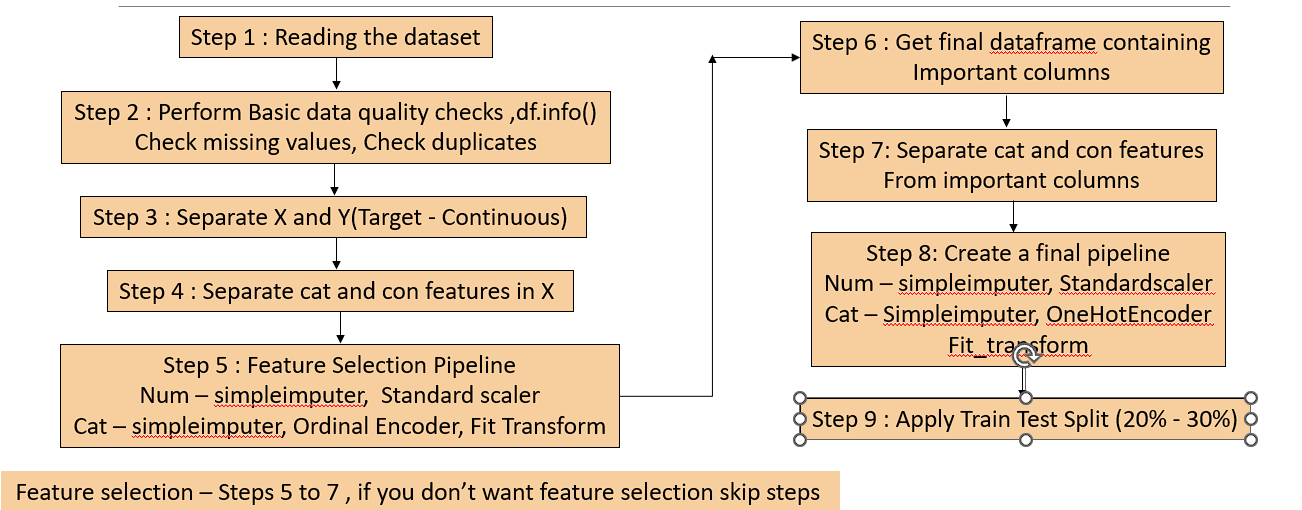

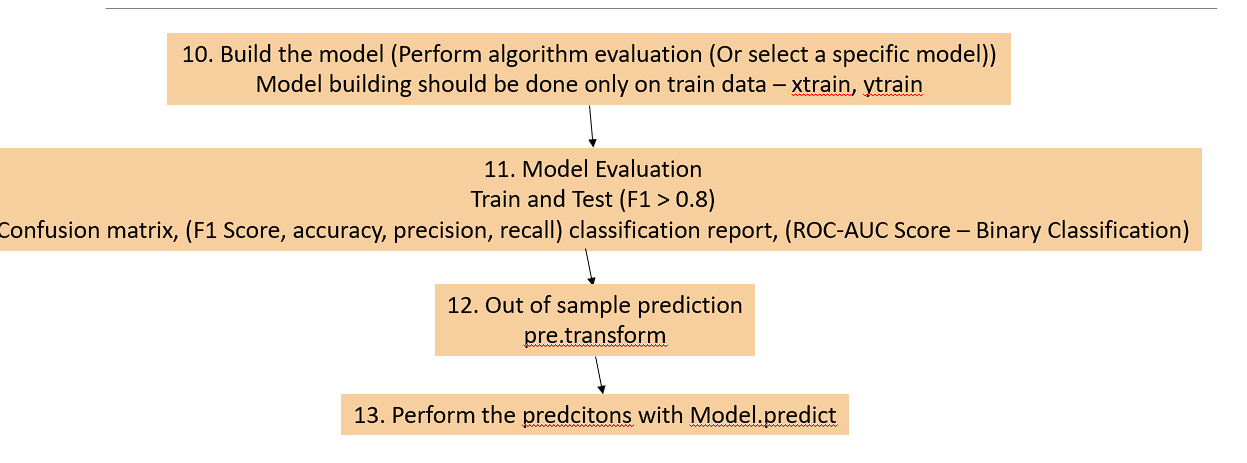

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1. Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

### Step 2. Seperate X and Y values

In [9]:
X = df.drop(columns=['id', 'CustomerId', 'Surname', 'Exited'])
Y = df[['Exited']]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [11]:
Y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

Exited
0         130113
1          34921
Name: count, dtype: int64

<Axes: xlabel='Exited'>

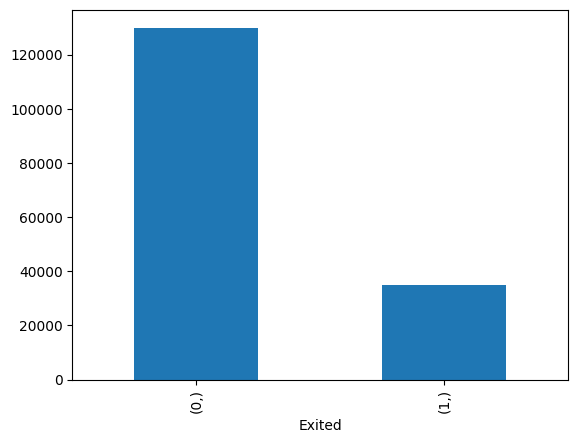

In [13]:
Y.value_counts().plot(kind='bar')

### Step 3. Get categorical and continuous features in X

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
cat

['Geography', 'Gender']

In [16]:
con

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### Step 5. Create a feature selection pipeline for X
cat - OrdinalEncoder

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [19]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [20]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [21]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,2.0,1.0


### Perform mutual information feature selection

In [22]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00309195, 0.08289275, 0.00292455, 0.0207324 , 0.10244502,
       0.01363732, 0.03644279, 0.00746391, 0.02496908, 0.0333035 ])

In [23]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi

num__CreditScore        0.003092
num__Age                0.082893
num__Tenure             0.002925
num__Balance            0.020732
num__NumOfProducts      0.102445
num__HasCrCard          0.013637
num__IsActiveMember     0.036443
num__EstimatedSalary    0.007464
cat__Geography          0.024969
cat__Gender             0.033303
dtype: float64

In [24]:
mi = mi.sort_values(ascending=False)

In [25]:
mi

num__NumOfProducts      0.102445
num__Age                0.082893
num__IsActiveMember     0.036443
cat__Gender             0.033303
cat__Geography          0.024969
num__Balance            0.020732
num__HasCrCard          0.013637
num__EstimatedSalary    0.007464
num__CreditScore        0.003092
num__Tenure             0.002925
dtype: float64

num__NumOfProducts      0.102445
num__Age                0.082893
num__IsActiveMember     0.036443
cat__Gender             0.033303
cat__Geography          0.024969
num__Balance            0.020732
num__HasCrCard          0.013637
num__EstimatedSalary    0.007464
num__CreditScore        0.003092
num__Tenure             0.002925
dtype: float64

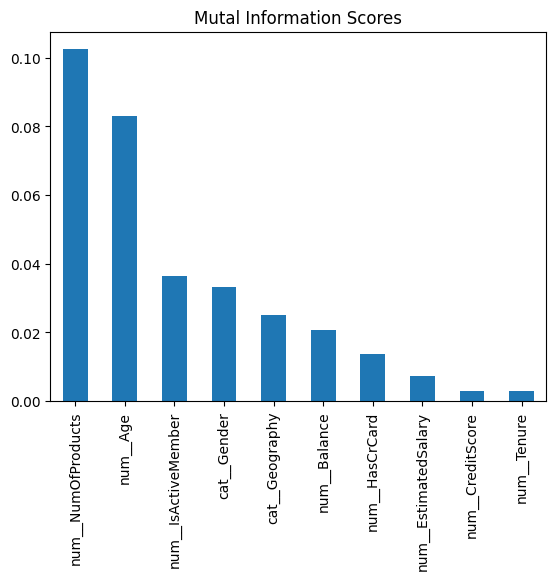

In [26]:
mi.plot(kind='bar', title='Mutal Information Scores')
mi

### Select the top 7 features (bottom 3 features are not that significant)

In [27]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=7)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Age', 'num__Balance', 'num__NumOfProducts', 'num__HasCrCard',
       'num__IsActiveMember', 'cat__Geography', 'cat__Gender'],
      dtype=object)

### Get the original column names

In [28]:
sel_cols[0].split('__')

['num', 'Age']

In [29]:
sel_cols[0].split('__')[1]

'Age'

In [30]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [31]:
imp_cols

['Age',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Geography',
 'Gender']

In [32]:
X_sel = X[imp_cols]
X_sel.head()

,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography,Gender
0,33.0,0.00,2,1.0,0.0,France,Male
1,33.0,0.00,2,1.0,1.0,France,Male
2,40.0,0.00,2,1.0,0.0,France,Male
3,34.0,148882.54,1,1.0,1.0,France,Male
4,33.0,0.00,2,1.0,1.0,Spain,Male


### Step 7. Seperate cat and con features again

In [33]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [34]:
cat_sel

['Geography', 'Gender']

In [35]:
con_sel

['Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

### Step 8. Create a final pipeline for preprocessing

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [38]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [39]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [40]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Balance', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Geography', 'Gender'])])

In [41]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-0.578074,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
1,-0.578074,-0.883163,0.814298,0.571263,1.00447,1.0,0.0,0.0,0.0,1.0
2,0.211354,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
3,-0.465299,1.486918,-1.013348,0.571263,1.00447,1.0,0.0,0.0,0.0,1.0
4,-0.578074,-0.883163,0.814298,0.571263,1.00447,0.0,0.0,1.0,0.0,1.0


### Apply train test split

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [43]:
xtrain.shape

(132027, 10)

In [44]:
xtest.shape

(33007, 10)

In [45]:
ytrain.value_counts()

Exited
0         104061
1          27966
Name: count, dtype: int64

In [46]:
ytest.value_counts()

Exited
0         26052
1          6955
Name: count, dtype: int64

### Step 9. Algorithm evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [48]:
dct = {'Logistic':LogisticRegression(),       
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [49]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [50]:
for name, model in dct.items():
    # Train and build the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calulate f1 score both in train and test
    f1_tr = f1_score(ytrain, ypred_tr, average='macro')
    f1_ts = f1_score(ytest, ypred_ts, average='macro')
    # Calculate cross validated scores
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Print the results for each model
    print(f'Model Name {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print(f'F1 Cross Val : {f1_cv:.4f}')
    print('\n=====================================================\n')

Model Name Logistic

Training F1 : 0.6970
Testing F1 : 0.6980
F1 Cross Val : 0.6968


Model Name Decision Tree

Training F1 : 0.9152
Testing F1 : 0.7305
F1 Cross Val : 0.7291


Model Name Random Forest

Training F1 : 0.9156
Testing F1 : 0.7451
F1 Cross Val : 0.7480


Model Name Gradient Boost

Training F1 : 0.7734
Testing F1 : 0.7765
F1 Cross Val : 0.7725




### Selecting gradient boosting algorith as it has highest cross val score of 0.7725

### Hyperparameter tuning

In [51]:
params = {'learning_rate':[0.001, 0.01, 0.1, 0.2],
         'n_estimators':[10, 100, 200, 300],
         'max_depth':[2, 3, 4, 5]}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [10, 100, 200, 300]},
                   scoring='f1')

In [53]:
rscv.best_score_

0.6279463753684149

In [54]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [55]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier()

### Model evaluation
### Accuracy

In [56]:
best_gbc.score(xtrain, ytrain)

0.8646186007407576

In [57]:
best_gbc.score(xtest, ytest)

0.8665434604780804

### F1 scores macro

In [58]:
ypred_tr1 = best_gbc.predict(xtrain)
ypred_ts1 = best_gbc.predict(xtest)

In [59]:
f1_score(ytrain, ypred_tr1, average='macro')

0.7733865025891932

In [60]:
f1_score(ytest, ypred_ts1, average='macro')

0.7765352767882379

In [61]:
cross_val_score(best_gbc, xtrain, ytrain, cv=5, scoring='f1_macro')

array([0.76781635, 0.76871049, 0.77587148, 0.77665179, 0.77334329])

### Plot confusion matrix for best_gbc

In [62]:
best_gbc.classes_

array([0, 1], dtype=int64)

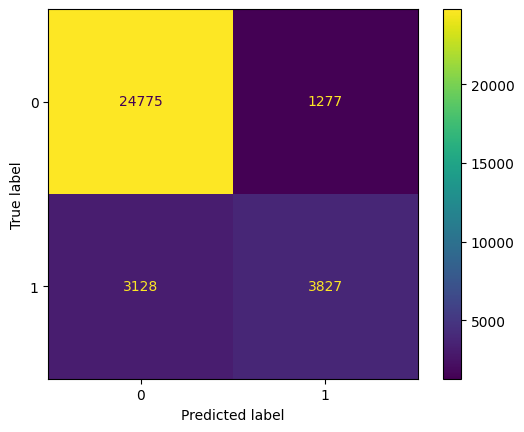

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Classification report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.55      0.63      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



### Plot the roc auc curve

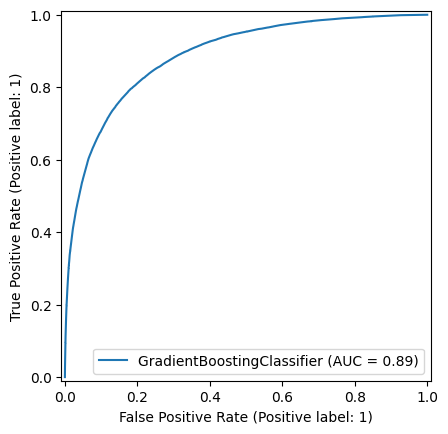

In [65]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc, xtrain, ytrain)

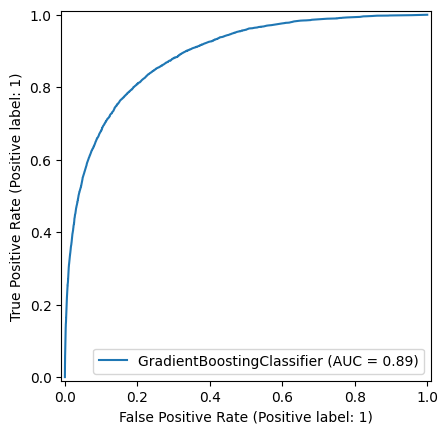

In [66]:
RocCurveDisplay.from_estimator(best_gbc, xtest, ytest)

In [67]:
scores = cross_val_score(best_gbc, xtrain, ytrain, cv=5, scoring='roc_auc')
scores

array([0.88642814, 0.88589776, 0.88868419, 0.8894105 , 0.88817356])

### Out of sample prediction

In [68]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [69]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-1.705829,-0.883163,0.814298,-1.750507,1.00447,1.0,0.0,0.0,1.0,0.0
1,0.888007,-0.883163,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0
2,-0.465299,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0
3,-0.239748,-0.883163,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
4,-0.014197,1.047249,-1.013348,0.571263,-0.99555,0.0,1.0,0.0,0.0,1.0


In [70]:
preds = best_gbc.predict(xnew_pre)
preds[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [71]:
probs = best_gbc.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.02546383, 0.84416545, 0.03632262, 0.28353846, 0.36757359])

### Save above results in dataframe

In [72]:
df_final = xnew[['id']]
df_final

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [73]:
df_final['Exited_pred'] = preds
df_final['Prob'] = probs

In [74]:
df_final.head()

,id,Exited_pred,Prob
0,165034,0,0.025464
1,165035,1,0.844165
2,165036,0,0.036323
3,165037,0,0.283538
4,165038,0,0.367574


In [75]:
df_final['Exited_pred'].value_counts()

Exited_pred
0    93134
1    16889
Name: count, dtype: int64

<Axes: xlabel='Exited_pred'>

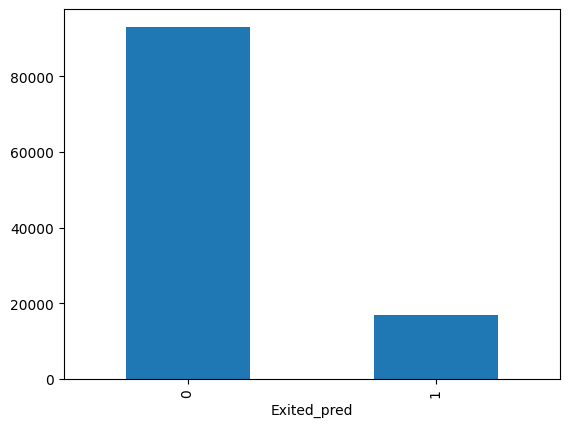

In [76]:
df_final['Exited_pred'].value_counts().plot(kind='bar')